# BCSD Infographic notebook
This notebook provides various processing and infographics on COVID dashboard reporting for Berkeley County School District

## Data imported and added to dataframe

In [54]:

import csv
import pprint as pp
from datetime import datetime, date, time
from collections import namedtuple

import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import ipywidgets as my_widgets

keys = ['school','area','Date','staff_count','student_count','Datetime', 'staff_close_contacts','student_close_contacts']
values = ['School','Area','Date','Staff Count','Student Count','DateTime', 'Staff Close Contacts', 'Student Close Contacts']

headers = dict(zip(keys, values))
record = namedtuple('Record', keys)

# Open CSV File and deal with data format being changed. Write to new CSV file
with open('./output/data.csv', 'r', newline='') as fp:
    with open('./output/cleansed_data.csv', 'w', newline = '') as fp_out:
        data = csv.reader(fp)
        next(data)
        writer = csv.DictWriter(fp_out, fieldnames=values)
        writer.writeheader()

        for row in data:
            if len(row) == 6:
                r = record(*row, '', '')
                writer.writerow(dict(zip(values, tuple(r))))
            elif len(row) == 7:
                r = record(row[0],'', row[1], row[2],row[3],row[6], row[4], row[5])
                writer.writerow(dict(zip(values, tuple(r))))
            else:
                print(row)

with open('./output/cleansed_data.csv', 'r', newline = '') as fp_in:
    df = pd.read_csv(fp_in, parse_dates=['Date','DateTime'], infer_datetime_format=True)

    # Drop any duplicate data entries
    cleaned_df = df.replace('Mt Holly Elementary', 'Mount Holly Elementary')
    cleaned_df = cleaned_df.drop_duplicates(['School','Date'], keep='last')
    

## List all schools and areas the district is tracking

In [55]:
print(f"The school district is tracking {len(cleaned_df.School.unique())} schools, offices or departments.")
print(f"Here is the full list.")
pp.pprint(list(cleaned_df.School.unique()), compact=True, width=120)

The school district is tracking 85 schools, offices or departments.
Here is the full list.
['Berkeley County School District', 'Mount Holly Elementary', 'Academic Services', 'Administrative Services',
 'Adult Education - Hanahan', 'Adult Education - Moncks Corner', 'Berkeley Alternative', 'Berkeley Elementary',
 'Berkeley High School', 'Berkeley Intermediate', 'Berkeley Middle', 'Berkeley Middle College', 'Board of Education',
 'Bonner Elementary', 'Boulder Bluff Elementary', 'Bowens Corner Elementary', 'Cainhoy Elementary',
 'Cane Bay Elementary', 'Cane Bay High', 'Cane Bay Middle', 'Capital Improvements', 'Career Technical Ed', 'CDEP',
 'Child Nutrition', 'College Park Elementary', 'College Park Middle', 'Communications / Public Relations',
 'Cross Elementary', 'Cross High', 'Daniel Island School', 'Dist Office Transportation', 'Evaluation & Leadership',
 'Financial Services', 'First Steps', 'Foxbank Elementary', 'Goose Creek Elementary', 'Goose Creek High',
 'Hanahan Elementary', 'H

## Top 5 Highest Schools Today

###  By Student Count

In [56]:
most_recent_date = cleaned_df.Date.max().date()
fav_cols = ["School", "Date", "Staff Count", "Student Count", "Staff Close Contacts", "Student Close Contacts"]
if most_recent_date != date.today():
    print(f"Data is not available for today: {date.today()}")
    print(f"Most recent date with data is {most_recent_date}")
cases_today = cleaned_df[cleaned_df.Date >= datetime.combine(most_recent_date,time())]
highest_student_cnt = cases_today.sort_values(by=["Student Count"], ascending=False)
highest_student_cnt[highest_student_cnt.School!='Berkeley County School District'][fav_cols].head()

,School,Date,Staff Count,Student Count,Staff Close Contacts,Student Close Contacts
649,Berkeley Middle,2021-09-08,9,67,1.0,242.0
657,Cane Bay Middle,2021-09-08,2,63,4.0,262.0
687,Stratford High,2021-09-08,3,45,0.0,196.0
692,Whitesville Elementary,2021-09-08,6,38,4.0,103.0
667,Goose Creek High,2021-09-08,0,33,0.0,137.0


### By Staff Count

In [57]:
highest_staff_cnt = cases_today.sort_values(by=["Staff Count"], ascending=False)
highest_staff_cnt[highest_staff_cnt.School!='Berkeley County School District'][fav_cols].head()

,School,Date,Staff Count,Student Count,Staff Close Contacts,Student Close Contacts
649,Berkeley Middle,2021-09-08,9,67,1.0,242.0
677,Nexton Elementary,2021-09-08,7,28,2.0,88.0
681,Sangaree Elementary,2021-09-08,6,31,2.0,87.0
692,Whitesville Elementary,2021-09-08,6,38,4.0,103.0
663,Devon Forest Elementary,2021-09-08,5,13,3.0,61.0


## Top 5 Highest Schools All Time

###  By Student Count

In [58]:
all_time_students = cleaned_df.sort_values(by=["Student Count","School"], ascending=False).drop_duplicates(["School"], keep='first')
all_time_students[all_time_students.School!='Berkeley County School District'][fav_cols].head()

,School,Date,Staff Count,Student Count,Staff Close Contacts,Student Close Contacts
582,Stratford High,2021-09-03,6,116,NaN,NaN
545,Berkeley Middle,2021-09-03,7,104,NaN,NaN
553,Cane Bay Middle,2021-09-03,2,88,NaN,NaN
439,Berkeley High School,2021-09-01,2,78,NaN,NaN
500,Cane Bay High,2021-09-02,4,77,NaN,NaN


### By Staff Count

In [59]:
all_time_students = cleaned_df.sort_values(by=["Staff Count","School"], ascending=False).drop_duplicates(["School"], keep='first')
all_time_students[all_time_students.School!='Berkeley County School District'][fav_cols].head()

,School,Date,Staff Count,Student Count,Staff Close Contacts,Student Close Contacts
577,Sangaree Elementary,2021-09-03,10,48,NaN,NaN
649,Berkeley Middle,2021-09-08,9,67,1.0,242.0
29,Cane Bay High,2021-08-24,8,43,NaN,NaN
490,Berkeley Elementary,2021-09-02,8,32,NaN,NaN
587,Whitesville Elementary,2021-09-03,7,49,NaN,NaN


In [60]:
def print_recent_daily_difference(given_school):
    #current_district_cnts = given_school[given_school.Date.apply(datetime.date) == most_recent_date].tail(1)
    maximum_date = given_school.Date.max().date()
    current_district_cnts = given_school[given_school.Date.apply(datetime.date) == maximum_date].tail(1)
    curr_district_staff_cnt = current_district_cnts["Staff Count"].iat[0]
    curr_district_student_cnt = current_district_cnts["Student Count"].iat[0]
       
    previous_date = given_school[given_school.Date.apply(datetime.date) != maximum_date].Date.max()

    previous_day_district = given_school[given_school.Date == previous_date]
    previous_district_staff_cnt = previous_day_district["Staff Count"].iat[0]
    previous_district_student_cnt = previous_day_district["Student Count"].iat[0]

    print(f"On {maximum_date} Student Count: {curr_district_student_cnt}. Staff Count: {curr_district_staff_cnt}")
    print(f"On {previous_date.date()} Student Count: {previous_district_student_cnt}. Staff Count: {previous_district_staff_cnt}")
    print(f"Difference between {maximum_date} and {previous_date.date()}. Student Count: {curr_district_student_cnt-previous_district_student_cnt}. Staff Count: {curr_district_staff_cnt-previous_district_staff_cnt}")

## Graphs

### BCSD - 14 Day Cumulative reported daily

On 2021-09-08 Student Count: 836. Staff Count: 86
On 2021-09-07 Student Count: 886. Staff Count: 76
Difference between 2021-09-08 and 2021-09-07. Student Count: -50. Staff Count: 10


[]

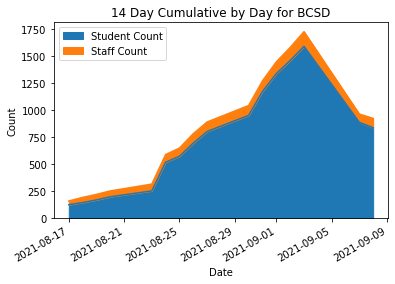

In [61]:
district = cleaned_df[cleaned_df.School=='Berkeley County School District']

print_recent_daily_difference(district)
    
bcsd_ax = district.plot("Date",["Student Count", "Staff Count"], kind='area', ylabel='Count', title="14 Day Cumulative by Day for BCSD")
bcsd_ax.plot()

### Mount Holly Elementary

On 2021-09-08 Student Count: 25. Staff Count: 2
On 2021-09-07 Student Count: 30. Staff Count: 2
Difference between 2021-09-08 and 2021-09-07. Student Count: -5. Staff Count: 0


[]

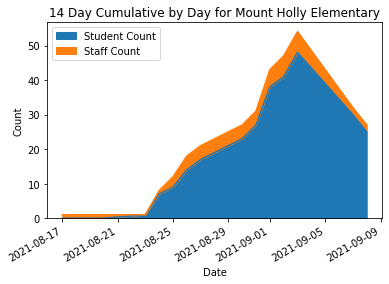

In [62]:
district = cleaned_df[cleaned_df.School=='Mount Holly Elementary']
print_recent_daily_difference(district)
mhe_ax = district.plot("Date",["Student Count", "Staff Count"], kind='area', ylabel='Count', title="14 Day Cumulative by Day for Mount Holly Elementary")
mhe_ax.plot()

### Bonner Elementary

On 2021-09-08 Student Count: 17. Staff Count: 4
On 2021-09-07 Student Count: 12. Staff Count: 2
Difference between 2021-09-08 and 2021-09-07. Student Count: 5. Staff Count: 2


[]

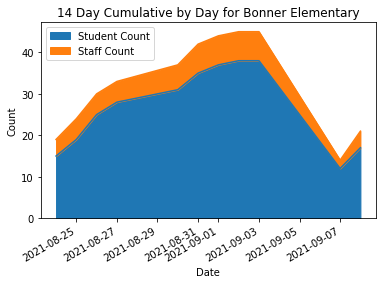

In [63]:
district = cleaned_df[cleaned_df.School=='Bonner Elementary']
print_recent_daily_difference(district)
bonn_ax = district.plot("Date",["Student Count", "Staff Count"], kind='area', ylabel='Count', title="14 Day Cumulative by Day for Bonner Elementary")
bonn_ax.plot()